### 1. 바다나우 어텐션 함수(Bahdanau Attention Function)
----------------
어텐션 메커니즘을 함수로 정의할 때, 바다나우 어텐션 함수의 입/출력은 다음과 같이 정의할 수 있음

***Attention(Q, K, V) = Attention Value***


여기서 어텐션 함수의 Query는 디코더 셀의 t 시점의 은닉상태가 아니라 t-1 시점의 은닉상태임


### 2. 바다나우 어텐션 연산 순서


#### 2-1. 어텐션 스코어(Attention Score) 구하기


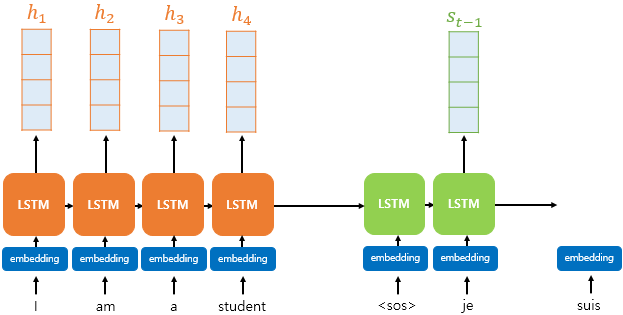

인코더의 시점(time step)을 각각 1, 2, ... N이라고 하였을 때 인코더의 은닉상태(hidden state)를 각각 $h_1, h_2, ... h_N$라고 함. 디코더의 현재 시점 t에서의 디코더의 은닉상태(hidden state)를 $s_t$라고 함. 또한, 여기서는 인코더의 은닉상태와 디코더의 은닉상태의 차원이 같다고 가정함. 위의 그림은 인코더의 은닉상태와 디코더의 은닉상태가 동일하게 차원이 4임

앞서 **루옹 어텐션에서는 Query로 디코더의 t 시점의 은닉상태를 사용한 것과 달리, 바다나우 어텐션에서는 t-1 시점의 은닉상태 $s_{t-1}$를 사용함**. 바다나우 어텐션 스코어 함수 즉, $s_{t-1}$과 인코더의 i번째 은닉상태의 어텐션 스코어 계산 방법은 아래와 같음

$$score(s_{t-1},\ h_{i}) = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}h_{i})$$



단, $W_a, W_b, W_c$는 학습가능한 가중치 행렬임. $s_{t-1}$와 $h_1, h_2, h_3, h_4$의 어텐션 스코어를 각각 구해야 하므로 병렬 연산을 위해 $h_1, h_2, h_3, h_4$를 하나의 행렬 $H$로 둠. 수식은 다음과 같이 변경됨

$$score(s_{t-1},\ H) = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}H)$$

그림을 통해 이해해 보면, 우선 $W_{b}s_{t-1}$와 $W_cH$를 각각 구하면 다음과 같음

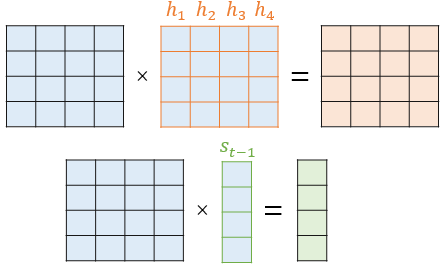

이 둘을 더한 후, 하이퍼볼릭탄젠트 함수를 지나도록 함

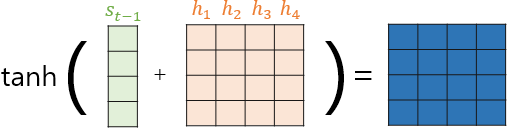

지금까지 진행된 연산의 수식은 다음과 같음

$$tanh(W_{b}s_{t-1}+W_{c}H)$$

이제 $W_{a}^{T}$와 곱하여 $s_{t-1}$와 $h_1, h_2, h_3, h_4$의 유사도가 기록된 스코어벡터 $e^{t}$를 얻음

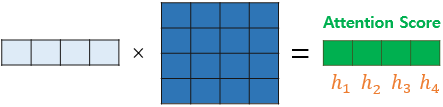

$$e^{t} = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}H)$$

#### 2-2. 소프트맥스(softmax) 함수를 통해 어텐션 분포(Attention Distribution)를 구함


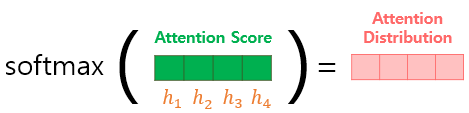

$e^t$에 소프트맥스 함수를 적용하여 모든 값을 합하면 1이 되는 확률분포를 얻어냄. 이를 어텐션 분포(Attention Distribution)라고 하며, 각각의 값은 어텐션 가중치(Attention Weight)라고 함

#### 2-3. 각 인코더의 어텐션 가중치와 은닉상태를 가중합하여 어텐션 값(Attention Value) 구하기


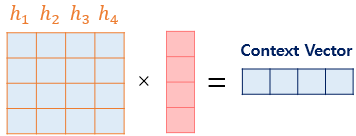

지금까지의 정보들을 합치는 단계로, 어텐션의 최종 결과값을 얻기 위해 각 인코더의 은닉상태와 어텐션 가중치 값들을 곱하고, 최종적으로 모두 더함. 요약하면 가중합을 한다고 말할 수 있음. 이 벡터는 인코더의 문맥을 포함하고 있다고 하여 컨텍스트 벡터(context vector)라고 부름

#### 2-4. 컨텍스트 벡터로부터 $s_t$ 구하기

기존의 LSTM이 $s_t$를 구할 때, 아래 그림을 통해 상기해 봄. 기존의 LSTM은 이전 시점의 셀로부터 전달받은 은닉상태 $s_{t-1}$와 현재 시점의 입력 $x_t$를 가지고 연산함. 아래의 LSTM은 seq2seq의 디코더이며, 현재 시점의 입력 $x_t$는 임베딩된 단어 벡터임



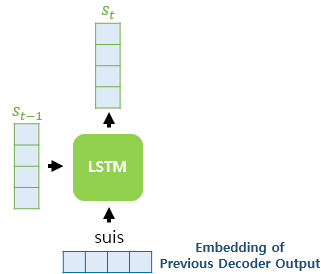

바다나우 어텐션 메커니즘에서는 컨텍스트 벡터와 현재 시점의 입력인 단어의 임베딩 벡터를 연결(concatenate)하고, 현재 시점의 새로운 입력으로 사용하는 모습을 보여줌. 그리고 이전 시점의 셀로부터 전달받은 은닉상태 $s_{t-1}$와 현재 시점의 새로운 입력으로부터 $s_t$를 구함

기존의 LSTM이 임베딩된 단어 벡터를 입력으로 하는 것에서 컨텍스트 벡터와 임베딩된 단어벡터를 연결(concatenate)하여 입력으로 사용하는 것이 다름

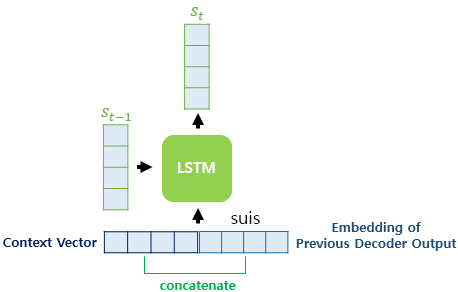

이후에는 어텐션 메커니즘을 사용하지 않는 경우와 동일하며, $s_t$는 출력층으로 전달되어 현재 시점의 예측값을 구하게 됨